# Assignment 6 Knock Airport Weather
## Assignment on Time Series
### Author: Gerry Callaghan


In [1]:
# We'll start with importing all our libraries

# I'll need pandas for importing our data into dataframes
import pandas as pd

# I'll need numpy for various operations on our dataframes
import numpy as np

# I'll need datetime to reformat the dates for our data 
import datetime as dt

# I'll need matplotlib for charting our regressions
import matplotlib.pyplot as plt

# I'll use this for formating the dates on graphs
import matplotlib.dates as mdates

Let's import the source csv file. <br/>
This file is from: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv <br/>
it comes from this source: https://data.gov.ie/dataset/knock-airport-hourly-data/resource/d0aaf256-6854-4447-90bf-944b09105e40<br/>
so the various headers and legend keys can be read about on this site.

In [2]:
# Read in our data from the URL down into the csv file, this is done as follows:
# Assign our URL variable the actual URL in a string format
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv" 

# Before importing the CSV file into a dataframe, 
# download the csv from an internet browser and open it in a spreadsheet.
# In the spradsheet, I can see there are a lot of columns, 
# most of which we don't need for the objectives of this exercise.
# It also tells me that the data does not start until row 24.

# I will assign temporary names of "extras" so the superfluous columns 
# (I will be removing them shortly but this way, I can ensure our headings are aligned correctly with the values in the columns)
names = ["date","extra1","rain","extra2","temp","extra5","wetb","dewpt","vappr","rhum","msl","extra3","extra4","wdsp","wddir","ww","w","sun","vis","clht","clamt","cloud_amount"]

# I pass in the URL string to the read_csv() function, 
# and set my dataframe df equal to the data, from "row 24" onwards,
# and on import assign the names to the relevant column names
df = pd.read_csv(url, header=None,names=names,skiprows=24)

# just to get a preview of that data
# print(f"{df.head()}\n")


/tmp/ipykernel_14376/2334669107.py:18: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, header=None,names=names,skiprows=24)


In [3]:
# Now to drop those superfluous columns 
# I create a drop_col_list variable and assign it to the value of an array containing all the columns (series)
# I want to remove from our dataframe
drop_col_list = ['extra1', 'rain', 'extra2', 'extra5', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'extra3', 'extra4', 'wdsp', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'cloud_amount']

# now I will use the drop() function in pandas, setting the columns equal to our variable containing the list of columns to drop, 
# and selecting "in place" so it removes them in the source dataframe rather than create a copy of the dataframe.
df.drop(columns=drop_col_list, inplace=True)

# Now to view the list of columns
# I create a variable called headers, and assign it equal to the list of the columns before printing the value of the variable
headers = df.columns.tolist()
print(f"{headers}\n")

['date', 'temp']



In [4]:
# There are a lot of rows in this data, and because the preview does not give me a large preview,
# I will export it out to a csv where I can import it into a spreadsheet and view properly.
df.to_csv("knock_airport_data.csv")   

### Part 1a: Plot the Temperature
It should be noted that one of the columns contains dates (albeit in object type) and a second column contains the temperatures.

In [5]:
# Our first exercise is to confirm the type of series our date column is
print(f"{type(df["date"])}\n")

print(f"{df["date"]}\n")


<class 'pandas.core.series.Series'>

0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
257149    30-nov-2025 20:00
257150    30-nov-2025 21:00
257151    30-nov-2025 22:00
257152    30-nov-2025 23:00
257153    01-dec-2025 00:00
Name: date, Length: 257154, dtype: object



In [6]:
# the date column is of type object. So, for time series, we must convert it to datetime (year, month, day) 
# using the dateime() function as follows:
df["date"]= pd.to_datetime(df['date'])

# just to confirm it is now of type datetime
print(f"{df["date"]}\n")

/tmp/ipykernel_14376/2409844406.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"]= pd.to_datetime(df['date'])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
257149   2025-11-30 20:00:00
257150   2025-11-30 21:00:00
257151   2025-11-30 22:00:00
257152   2025-11-30 23:00:00
257153   2025-12-01 00:00:00
Name: date, Length: 257154, dtype: datetime64[ns]



In [7]:
# given that I'm using timeseries data, I will make my Date column my index
df.set_index('date', inplace=True)

# to view the head of the dataframe
df.head(10)

,temp
date,
1996-04-10 14:00:00,11.5
1996-07-31 08:00:00,11.5
1996-07-31 09:00:00,11.6
1996-07-31 10:00:00,12.9
1996-07-31 11:00:00,14.5
1996-07-31 12:00:00,14.4
1996-07-31 13:00:00,14.9
1996-07-31 14:00:00,13.9
1996-07-31 15:00:00,13.2


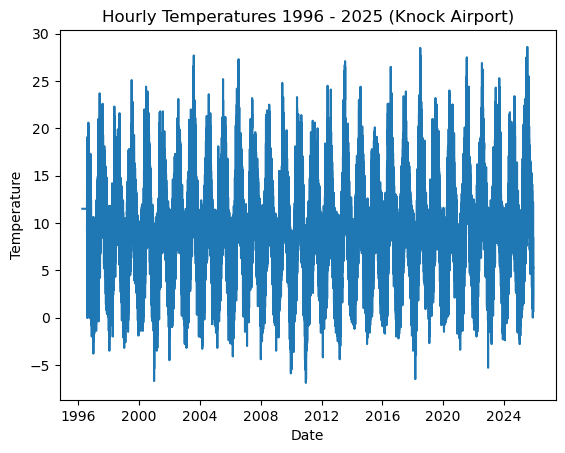

In [8]:
# Plotting the temperature.

# Using numpy to create two arrays, one for our dates and the other for our temperatures on each date(time)
x = np.array(df.index)
y = np.array(df["temp"])

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Hourly Temperatures 1996 - 2025 (Knock Airport)")

plt.plot(x,y)
plt.show()

### Part 1b: Plot the Mean Daily Temperature
To do this, I will use the resample() function to resample the mean hourly temperatures and calculate the mean daily temperatures based on the mean hourly temperatures.

In [9]:
# Resample allows us to break our dataframe into chunks and then plot the mean, sum etc. 

# In my case, to my new variable daily_mean_temp, I'm assigning it the value obtained
# by going to the temperature column "temp" and calculating its daily (indicated by a capital D in resample()) mean.

df_daily_mean_temp= df["temp"].resample("D").mean()
    
# I now print out a section of this to see that it looks right    
# print(f"{df_daily_mean_temp.head(20)}")

# I want to output to a csv file so i can assure myself it has done all the dates
df_daily_mean_temp.to_csv("mean_daily_temps_for_Knock2.csv") 


In [10]:
#print(f"{df_daily_mean_temp.index}")

# I have a lot of rows between April and August where there is just no data, so remove those rows between two dates using the drop () function
# I can do this using iloc on our index, which is the date. 
# as shown here https://stackoverflow.com/questions/71329396/drop-rows-by-index-with-date-index
df_daily_mean_temp = df_daily_mean_temp.drop(df_daily_mean_temp.loc["1996-04-10":"1996-07-31"].index)

#update the values in my csv file
df_daily_mean_temp.to_csv("mean_daily_temps_for_Knock2.csv") 

# now to print my daily mean temperatures
# print(f"{df_daily_mean_temp}")

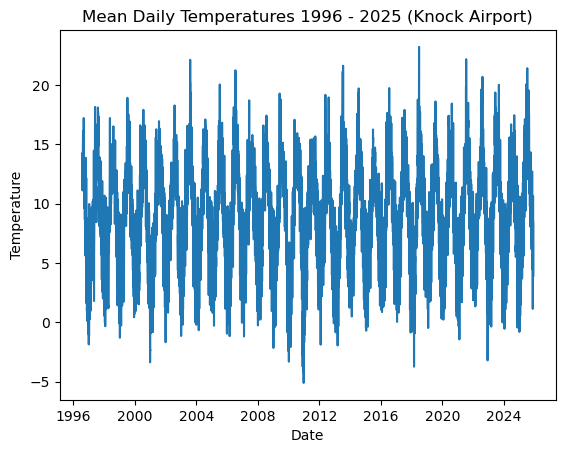

In [11]:
# Plotting the mean temperatures.

# Using numpy to create two arrays, one for our dates and the other for our mean daily temperatures
x = np.array(df_daily_mean_temp.index)
y = np.array(df_daily_mean_temp)

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Mean Daily Temperatures 1996 - 2025 (Knock Airport)")

plt.plot(x,y)
plt.show()


### Part 1c: Plot the Mean Monthly Temperature
I will use a similar method to that I used for the mean daily temperature.<br/>
In that case, I used the resampler() function to get the mean across the hours data for each day.<br/>
Now, I have daily mean returns so I will use these figures to calculate the mean monthly returns.

In [12]:
# I was going to use Pandas groupby function to first group the data by year, then month,  
# and to calculate the mean temperatures for each month
# This method was inspired by Example 3 https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-groupby/ 
'''
df_aggregated_data2 = df_aggregated_data.groupby(["year", "month"]).agg(
    avg_mean_temp = ('avg_mean_temp', 'mean')
    
)
'''
# But I think the resample () function is a better method
df_monthly_mean_temp = df_daily_mean_temp.resample("M").mean()

#I want to output to a csv file so i can assure myself it has done all the dates
df_monthly_mean_temp.to_csv("mean_monthly_temps_for_Knock.csv")   


/tmp/ipykernel_14376/3656856869.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_mean_temp = df_daily_mean_temp.resample("M").mean()


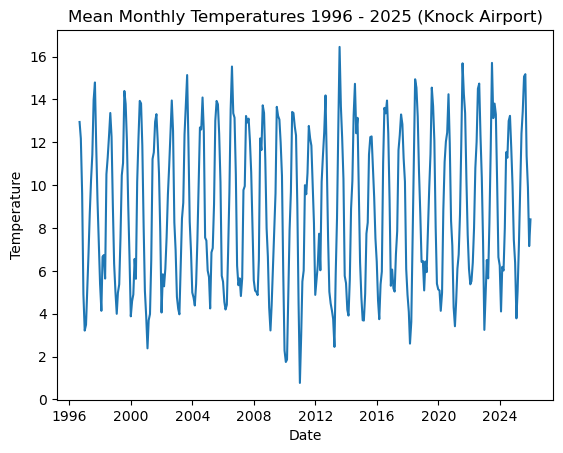

In [13]:
# Plotting the mean monthly temperatures.

# Using numpy to create two arrays, one for our dates and the other for our mean monthly temperatures
x = np.array(df_monthly_mean_temp.index)
y = np.array(df_monthly_mean_temp)

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Mean Monthly Temperatures 1996 - 2025 (Knock Airport)")

plt.plot(x,y)
plt.show()


#### Part 2a: Plot the Windspeed

I originally removed this from our dataframe, so let's reintroduce the data from the source csv file.



In [14]:
# Assign our URL variable the actual URL in a string format
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv" 

# we also must assign extra names so the column titles align with our column data
names = ["date","extra1","rain","extra2","temp","wetb","dewpt","vappr","rhum","msl","extra3","extra4","wdsp","wddir","ww","w","sun","vis","clht","clamt","cloud_amount"]

# in this case, there are no real values for windspeed until 1am on Aug 1st, so let's remove the first 42 rows as we did earlier

# Read in our data from the URL down into the csv file, this is done as follows:
df_wdsp = pd.read_csv(url, header=None,names=names,skiprows=42)


/tmp/ipykernel_14376/3584396380.py:10: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_wdsp = pd.read_csv(url, header=None,names=names,skiprows=42)


In [15]:
# I will drop the superfluous columns 
# Create a drop_col_list variable and assign it to the value of an array containing all the columns (series) 
# we want to remove from our dataframe
drop_col_list = ['extra1', 'rain', 'extra2', "temp", 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'extra3', 'extra4', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'cloud_amount']

# now use the drop function in pandas, setting the columns equal to the variable containing the list of columns to drop, 
# and selecting in place so it removes them in the source dataframe.
df_wdsp.drop(columns=drop_col_list, inplace=True)

# Let's view the list of columns
# Create a variable called headers, and assign it equal to the list of the columns before printing the value of the variable
headers = df_wdsp.columns.tolist()
print(f"{headers}\n")

['date', 'wdsp']



In [16]:
# There are missing data for 22:00 on August 1st, 1996, so let's interpolate across the rows using this method 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

#df.interpolate()
#df=df["wdsp"].fillna(method="ffill") - this is not working

# the following method was pulled from https://stackoverflow.com/questions/52835971/fill-nan-with-zero-python-pandas
# it seems that the function fillna(0) fills in the blank with 0, then converts that to a numeric value 
# using this function https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
df_wdsp['wdsp'] = pd.to_numeric(df_wdsp['wdsp'], errors='coerce').fillna(0)

# df_wdsp["wdsp"] = df_wdsp["wdsp"].astype(int) - this is not needed any longer because i've converted to a numeric

df_wdsp.info() # this shows me that the date column is of object type when i need it to be datetime
df_wdsp["date"] = df_wdsp["date"].astype("datetime64[ns]")

print(f"\nNow after changing the Date column type, we can verify it's type as datetime64[ns]\n")

df_wdsp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257136 entries, 0 to 257135
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    257136 non-null  object 
 1   wdsp    257136 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.9+ MB

Now after changing the Date column type, we can verify it's type as datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257136 entries, 0 to 257135
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    257136 non-null  datetime64[ns]
 1   wdsp    257136 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 MB


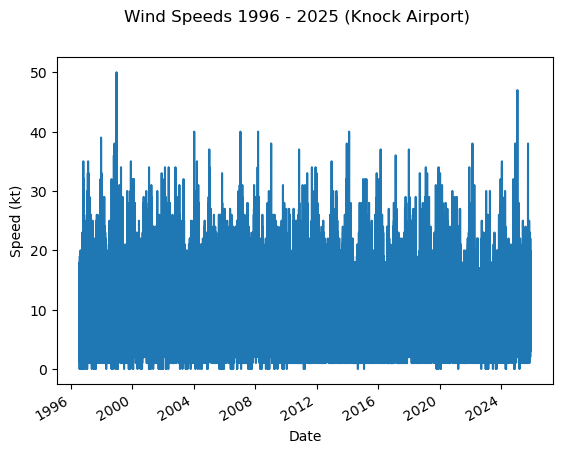

In [17]:
# Plotting the windspeed.

# Use numpy to create two arrays, one for our dates and the other for windspeed
# Because it takes a long time to render out the graph over the whole period, 


#my x-axis is the date
#x = np.array(df_wdsp["date"])

# my y-axis is the speed
#y = np.array(df_wdsp["wdsp"])

#plt.xlabel("Date")
#plt.ylabel("Speed (kt)")
#plt.title("Wind Speeds 1996 - 2025 (Knock Airport)")

#plt.plot(x,y)
#plt.show()

fig,ax = plt.subplots()

ax.plot(df_wdsp["date"],df_wdsp["wdsp"])
ax.set_xlabel("Date")
ax.set_ylabel("Speed (kt)")

fig.suptitle("Wind Speeds 1996 - 2025 (Knock Airport)")

# I have many dates along the x-axis so they overlay one another, the figure.autofmt_xdate() function in Matplotlib autoformats them
# you cna learn more about this function here https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.autofmt_xdate.html
fig.autofmt_xdate(rotation=30) 
# i need to reduce the number of entries on the x-axis. https://pandas.pydata.org/docs/user_guide/visualization.html


### Part 2b: Plot the Rolling Windspeed

In [18]:
# Looking at the first 24 entries, they are all the hourly figures. So I will use iloc on the index
print(f"{df_wdsp.head(24)}")

# this takes the first 24 values
df_wdsp_subset =df_wdsp.iloc[0:24]


                  date  wdsp
0  1996-08-01 01:00:00   6.0
1  1996-08-01 02:00:00   8.0
2  1996-08-01 03:00:00   9.0
3  1996-08-01 04:00:00   8.0
4  1996-08-01 05:00:00   8.0
5  1996-08-01 06:00:00   8.0
6  1996-08-01 07:00:00   7.0
7  1996-08-01 08:00:00  11.0
8  1996-08-01 09:00:00  11.0
9  1996-08-01 10:00:00  13.0
10 1996-08-01 11:00:00  13.0
11 1996-08-01 12:00:00  12.0
12 1996-08-01 13:00:00  14.0
13 1996-08-01 14:00:00  13.0
14 1996-08-01 15:00:00  13.0
15 1996-08-01 16:00:00  13.0
16 1996-08-01 17:00:00  13.0
17 1996-08-01 18:00:00  12.0
18 1996-08-01 19:00:00  11.0
19 1996-08-01 20:00:00  10.0
20 1996-08-01 21:00:00   9.0
21 1996-08-01 22:00:00   0.0
22 1996-08-01 23:00:00   7.0
23 1996-08-02 00:00:00   4.0


In [29]:
# Pandas allows us to calculate the rolling value over a particular period, 
# more can be learned here https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html#pandas.DataFrame.rolling 

# I will append a new column for the rolling mean windspeed to my dataframe
df_wdsp_subset["rolling_mean_windspeed"] = df_wdsp_subset["wdsp"].rolling(window=24, min_periods=1).mean()

print(f"My dataframe now looks like this now:\n{df_wdsp_subset.head(24)}")

My dataframe now looks like this now:
                  date  wdsp  rolling_mean_windspeed
0  1996-08-01 01:00:00   6.0                6.000000
1  1996-08-01 02:00:00   8.0                7.000000
2  1996-08-01 03:00:00   9.0                7.666667
3  1996-08-01 04:00:00   8.0                7.750000
4  1996-08-01 05:00:00   8.0                7.800000
5  1996-08-01 06:00:00   8.0                7.833333
6  1996-08-01 07:00:00   7.0                7.714286
7  1996-08-01 08:00:00  11.0                8.125000
8  1996-08-01 09:00:00  11.0                8.444444
9  1996-08-01 10:00:00  13.0                8.900000
10 1996-08-01 11:00:00  13.0                9.272727
11 1996-08-01 12:00:00  12.0                9.500000
12 1996-08-01 13:00:00  14.0                9.846154
13 1996-08-01 14:00:00  13.0               10.071429
14 1996-08-01 15:00:00  13.0               10.266667
15 1996-08-01 16:00:00  13.0               10.437500
16 1996-08-01 17:00:00  13.0               10.588235
17 1996-

/tmp/ipykernel_14376/2624398601.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wdsp_subset["rolling_mean_windspeed"] = df_wdsp_subset["wdsp"].rolling(window=24, min_periods=1).mean()


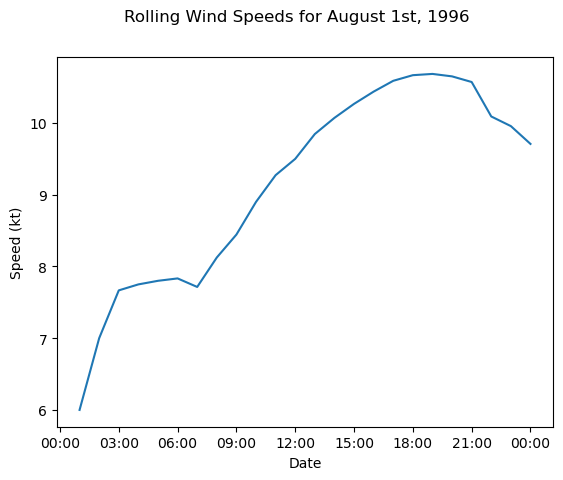

In [ ]:
# Plotting the rolling mean windspeed.

# I will use fig.ax method
fig,ax = plt.subplots()

ax.plot(df_wdsp_subset["date"],df_wdsp_subset["rolling_mean_windspeed"])
ax.set_xlabel("Date")
ax.set_ylabel("Speed (kt)")

fig.suptitle("Rolling Wind Speeds for August 1st, 1996")

# Using the fig.autofmt_xdate() function does not work because I have only one date yet I have 24 hours that need to be shown
# thankfully someone has already solved this. First I did a Google Search, and it gave me the example 
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
# more on mdates.DateFormatter can be found here https://stackoverflow.com/questions/73110081/matplotlib-dates-dateformatter-forcing-the-display-of-nanoseconds


### Part 2c: Plot the maximum windspeed for each day

In [ ]:
# Breaking out our date column into its constituent parts  
# This is based on https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# This will allow me to use the GroupBy function

# Extract the year from the date into it own column
df_wdsp["year"] = df_wdsp["date"].dt.year

# Extract the month from the date into it own column
df_wdsp["month"] = df_wdsp["date"].dt.month

# Extract the day from the date into it own column
df_wdsp["day"] = df_wdsp["date"].dt.day

# Extract the time from the date into it own column
df_wdsp['time'] = df_wdsp["date"].dt.time

# Now let's view all our columns
print(f"{(df_wdsp.head(6))}\n")


                 date  wdsp  year  month  day      time
0 1996-08-01 01:00:00   6.0  1996      8    1  01:00:00
1 1996-08-01 02:00:00   8.0  1996      8    1  02:00:00
2 1996-08-01 03:00:00   9.0  1996      8    1  03:00:00
3 1996-08-01 04:00:00   8.0  1996      8    1  04:00:00
4 1996-08-01 05:00:00   8.0  1996      8    1  05:00:00
5 1996-08-01 06:00:00   8.0  1996      8    1  06:00:00



In [ ]:
# The groupby function () works similar to the data sorting algorithm in Excel
# I sort the date by the year column, then month, then day column
# before calculating the maximum of the hourly values
# More on this here https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

df_wdsp["max_daily"] = df_wdsp.groupby(["year", "month", "day"]).max

print(f"{df_wdsp.head()}")

                max_daily_windspeed  \
year month day                        
1996 8     1                   14.0   
           2                   13.0   
           3                   10.0   
           4                   18.0   
           5                   14.0   

                                                        max_daily  
year month day                                                     
1996 8     1    <bound method GroupBy.max of <pandas.core.grou...  
           2    <bound method GroupBy.max of <pandas.core.grou...  
           3    <bound method GroupBy.max of <pandas.core.grou...  
           4    <bound method GroupBy.max of <pandas.core.grou...  
           5    <bound method GroupBy.max of <pandas.core.grou...  


ValueError: x and y must have same first dimension, but have shapes (24,) and (10715,)

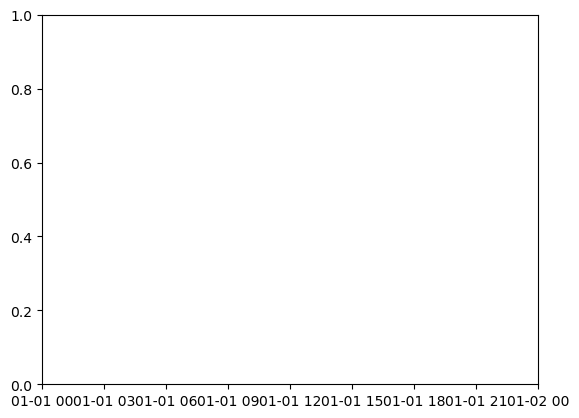

In [35]:
# Plotting the maximum daily windspeeds.

# I will use fig.ax method
fig,ax = plt.subplots()

ax.plot(df_wdsp_subset["date"],df_wdsp["max_daily"])
ax.set_xlabel("Date")
ax.set_ylabel("Speed (kt)")

fig.suptitle("Maximum Daily Wind Speeds")

fig.autofmt_xdate()




In [27]:
# If I want my plot my daily maximums, I need a column containing daily dates, therefore i need to rejoin my year and month and day into one column.
#  Like before, I will use the concatenation function in Pandas to join the two columns as strings 
#df['daily_date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str))
#print(f"{df}\n")

In [28]:
'''
# Plotting the windspeed.

# We use numpy to create two arrays, one for our dates and the other for windspeed
# Because it takes a long time to render out the graph over the whole period, 
# I'm going to take a subset of the period
df_sample =df.iloc[0:24]

x = np.array(df_sample["day"])
y = np.array(df_sample["max_daily_windspeed"])

plt.xlabel("Date")
plt.ylabel("Speed (kt)")
plt.title("Wind Speeds 1996 - 2025 (Knock Airport)")

plt.plot(x,y)
plt.show()

'''

'\n# Plotting the windspeed.\n\n# We use numpy to create two arrays, one for our dates and the other for windspeed\n# Because it takes a long time to render out the graph over the whole period, \n# I\'m going to take a subset of the period\ndf_sample =df.iloc[0:24]\n\nx = np.array(df_sample["day"])\ny = np.array(df_sample["max_daily_windspeed"])\n\nplt.xlabel("Date")\nplt.ylabel("Speed (kt)")\nplt.title("Wind Speeds 1996 - 2025 (Knock Airport)")\n\nplt.plot(x,y)\nplt.show()\n\n'